Karthik Konath (kk28699), Kyle Polansky (kpp446)

# <center>EE 379K-DS Lab 5<center>

# Problem 1: Linear Discriminant Analysis

##### 1.1) Generate 20 random points in d = 3, from a Gaussian multivariate distribution with mean [0, 0, 0] and covariance matrix (...). Let’s call this data with label 1. Also generate 20 random points in d = 3 from another Gaussian with mean [0, 0, 1] and covariance (...). Let’s call that data with label 2. Create a three dimensional plot of the clouds of data points, labeled with the two labels.

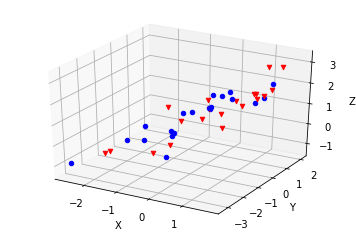

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
mean1=[0,0,0]
cov1=[[1,0.9,0.9],[0.9,1,0.9],[0.9,0.9,1]]
rp1 = np.random.multivariate_normal(mean,cov,20)

mean2=[0,0,1]
cov2=[[1,0.8,0.8],[0.8,1,0.8],[0.8,0.8,1]]
rp2 = np.random.multivariate_normal(mean,cov,20)


n=0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
while(n<len(rp1)):
    ax.scatter(rp1[n][0],rp1[n][1],rp1[n][2],c='b',marker='o')
    ax.scatter(rp2[n][0],rp2[n][1],rp2[n][2],c='r',marker='v')
    n+=1
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

##### 1.2) Perform a projection of the data on one dimension using Fischer’s Linear Discriminant as explained in class (see also http://research.cs.tamu.edu/prism/lectures/pr/pr_l10.pdf). (no sklearn Linear Discriminant Analysis functions here, just friendly linear algebra.)

[[ 20.76562352  20.88782854  11.21154286]
 [ 20.88782854  27.83473022  11.94707725]
 [ 11.21154286  11.94707725  28.64018492]]
[-0.01959096 -0.00435668  0.04440245]


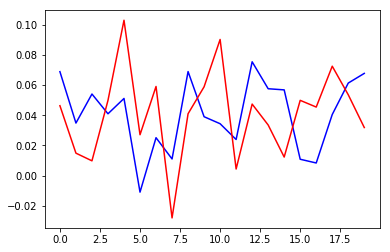

In [19]:
Sw=np.dot((rp1-mean1).T, (rp1-mean1))+np.dot((rp2-rp2).T, (rp2-rp2))
print Sw
wstar=np.dot(np.linalg.inv(Sw), np.subtract(mean2,mean1))
print wstar

plt.plot(np.dot(rp1, wstar), "b", label="rp1")
plt.plot(np.dot(rp2, wstar), "r", label="rp2")
plt.show()

##### 1.3) Use sklearn to perform Linear Discriminant Analysis. Compare the results.

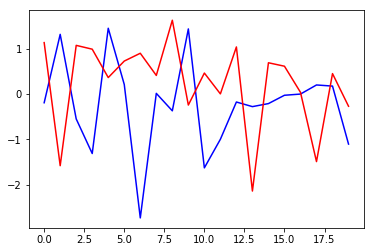

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=2)
y = np.hstack((np.zeros(20), np.ones(20)))
rp = np.concatenate([rp1,rp2])
rpLDA = clf.fit_transform(rp, y)
rp1LDA = rpLDA[:20]
rp2LDA = rpLDA[20:]
plt.plot(rp1LDA, "b", label="rp1")
plt.plot(rp2LDA, "r", label="rp2")
plt.show()

# Problem 2:  Problem 10 from Chapter 4

This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

##### 2.a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

##### 2.b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

##### 2.c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

##### 2.d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

##### 2.e) Repeat (d) using LDA.

##### 2.f) Repeat (d) using QDA.

##### 2.g) Repeat (d) using KNN with K = 1 .

##### 2.h) Which of these methods appears to provide the best results on this data?

##### 2.i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

# Problem 3: Problem 5 from Chapter 5

In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

##### 3.a) Fit a logistic regression model that uses income and balance to predict default.

In [121]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("data/Default.csv")
bi = (df['balance'],df['income'])
bi = np.array(bi).transpose()

lr = LogisticRegression()
lr.fit(bi, df['default'])
print "Predictions: ",lr.predict(bi)
print "Score: ",lr.score(bi, df['default'])

 Predictions:  ['No' 'No' 'No' ..., 'No' 'No' 'No']
Score:  0.9664


##### 3.b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

##### 3.b.i) Split the sample set into a training set and a validation set.

In [122]:
x_train, x_test, y_train, y_test = train_test_split(bi, df['default'], test_size=0.25, random_state=0)

##### 3.b.ii) Fit a multiple logistic regression model using only the training observations.

In [123]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### 3.b.iii)  Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

In [124]:
print "Predictions: ",lr.predict(x_test)

Predictions:  ['No' 'No' 'No' ..., 'No' 'No' 'No']


##### 3.b.iv) Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [125]:
print "Score: ", lr.score(x_test, y_test)

Score:  0.9612


##### 3.c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [126]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(bi, df['default'], test_size=.99, random_state=0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(bi, df['default'], test_size=.5, random_state=0)
x_train3, x_test3, y_train3, y_test3 = train_test_split(bi, df['default'], test_size=.25, random_state=0)
lr.fit(x_train1, y_train1)
lr.fit(x_train2, y_train2)
lr.fit(x_train3, y_train3)
print "Predictions: ",lr.score(x_test1, y_test1)
print "Predictions: ",lr.score(x_test2, y_test2)
print "Predictions: ",lr.score(x_test3, y_test3)

Predictions:  0.966060606061
Predictions:  0.9624
Predictions:  0.9612


Test with a size near max approaches the score gained while testing with the full data set the model was trained against. As you get further away the score seems to go down, which is expected since the first score is likely a result of overfitting.

##### 3.d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [127]:
df = pd.read_csv("data/Default.csv")
df.student = df.student.map(dict(Yes=1, No=0))
print df.student
bi = (df['balance'],df['income'],df['student'])
bi = np.array(bi).transpose()
x_train, x_test, y_train, y_test = train_test_split(bi, df['default'], test_size=0.25, random_state=0)
lr = LogisticRegression()
lr.fit(x_train, y_train)
print "Score: ",lr.score(x_test, y_test)

0       0
1       1
2       0
3       0
4       0
5       1
6       0
7       1
8       0
9       0
10      1
11      1
12      0
13      0
14      0
15      0
16      0
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      1
       ..
9970    1
9971    1
9972    0
9973    0
9974    1
9975    0
9976    0
9977    1
9978    0
9979    0
9980    1
9981    0
9982    0
9983    0
9984    0
9985    0
9986    1
9987    0
9988    0
9989    1
9990    0
9991    0
9992    0
9993    0
9994    1
9995    0
9996    0
9997    0
9998    0
9999    1
Name: student, Length: 10000, dtype: int64
Score:  0.9612


It seems that it made no difference

# Problem 4: Problem 8 from Chapter 5.

We will now perform cross-validation on a simulated data set.

##### 4.a) Generate a simulated data set as follows ... In this data set, what is n and what is p? Write out the model used to generate the data in equation form

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def gen_xy():
    global x, y
    x = np.random.randn(100)
    y = x - 2*(x**2) + np.random.randn(100)

n (number of samples): 100  
p (number of predictors): 1

##### 4.b) Create a scatterplot of X against Y . Comment on what you find.

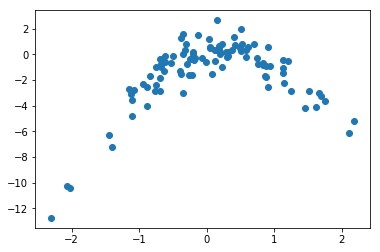

In [144]:
np.random.seed(1)
gen_xy()

plt.scatter(x, y)
plt.show()

The scatterplot axis are both centered at 0. Both X and Y are skewed negative. X and Y are correlated by a parabolic relationship.

##### 4.c)  Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd

def gen_rand_data():
    np.random.seed()
    gen_xy()
    
    global df1, df2, df3, df4
    df1 = pd.DataFrame({'x0': np.ones(100), 'x1': x})
    df2 = pd.DataFrame({'x0': np.ones(100), 'x1': x, 'x2': x**2})
    df3 = pd.DataFrame({'x0': np.ones(100), 'x1': x, 'x2': x**2, 'x3': x**3})
    df4 = pd.DataFrame({'x0': np.ones(100), 'x1': x, 'x2': x**2, 'x3': x**3, 'x4': x**4})

def get_score(x):
    return cross_val_score(LinearRegression(), x, y, cv=LeaveOneOut(), scoring='neg_mean_squared_error')

gen_rand_data()

##### 4.c.i) $Y = \beta_0 + \beta_1X + \epsilon$

In [243]:
print(get_score(df1).mean())

-5.841320240620483


##### 4.c.ii) $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$

In [244]:
print(get_score(df2).mean())

-1.0684136617867015


##### 4.c.iii) $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

In [245]:
print(get_score(df3).mean())

-1.0938894020584464


##### 4.c.iv) $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$

In [246]:
print(get_score(df4).mean())

-1.1441447401762184


##### 4.d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [252]:
gen_rand_data()

print(get_score(df1).mean())
print(get_score(df2).mean())
print(get_score(df3).mean())
print(get_score(df4).mean())

-11.758590683410386
-1.0253673207743532
-1.0438883706278488
-1.0401764795637651


The results are different since the data is randomly seeded, however the trends are the same, as described below.

##### 4.e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The 2nd model of the form $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$ had the smallest error.  

This was expected because the generated y's are based off an equation of the form $x^2$. The first model would have created a linear underfit and the 3rd and 4th models would have overfit, resulting in a lower test score.

##### 4.f)  Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [261]:
regression = LinearRegression().fit(X=df4, y=y)
print(regression.coef_)

[ 0.00000000e+00  1.07420037e+00 -1.80258636e+00 -6.79262095e-04
 -4.49816832e-02]


Yes, the coefficients model the equation very well. The coefficients show a 1:1 relationship with x and about a -2 relationship with $x^2$. $x^3$ and $x^4$ contribute very little to the model, and we can see very little difference in error scores above when those are used.